In [65]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [66]:
def get_time(filename):
    values = filename.split("_")
    for t_value in values:
        if t_value in ['2','4','6','8','10','12']:
            # print(t_value)
            return int(t_value)
    return None

In [67]:
features_col = ['Arflux1','Arflux2','Arflux3','Arflux4','Arflux5','Arflux6',
            'Fflux1','Fflux2','Fflux3','Fflux4','Fflux5','Fflux6',
            'ArExponent','FrExponent',
            'yield_at_zero1','yield_at_zero2','yield_at_zero3',
            'yield_max1','yield_max2','yield_max3',
            'theta_max1','theta_max2','theta_max3','mizk',
            'p1','p2','p3','p4','p5']

In [68]:
df_final = pd.DataFrame()
# valid_df_final = pd.DataFrame()
test_df_final = pd.DataFrame()

test_file_num = 0
turn = 0

for folder in os.listdir('C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles'):

    if turn==1: test_file_num+=6
    
    input_values = folder.split('_')[1:]
    input_values = [float(item) for item in input_values]

    # sorting file acc to len so that t= 10,12 gets to its original pos
    for file in sorted(os.listdir(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}'), key=len):

        if(turn == 0 or test_file_num>600):
            df = pd.read_csv(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}/{file}')

        #dropping rows with zero valies in it
            zero_values_row_index = df[df['FitRadius_Avg']==0].index
            df = df.drop(zero_values_row_index)

        #just for getting depth
            new_col_names = ['Z','avg fitradius', 'time']
            new_row_values =  [-df['Z'].iloc[0], df['FitRadius_Avg'].mean(), get_time(file)]
            new_df = pd.DataFrame([new_row_values],columns=new_col_names)

            for i in range(29):
                # print(features_col[i], input_values[i])
                new_df[features_col[i]] = input_values[i]
            df_final = pd.concat([df_final,new_df])   

        # elif file_num<2406:
        #     df = pd.read_csv(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}/{file}')
        #     zero_values_row_index = df[df['FitRadius_Avg']==0].index
        #     df = df.drop(zero_values_row_index)

        # #just for getting depth
        #     new_col_names = ['Z','avg fitradius', 'time']
        #     new_row_values =  [-df['Z'].iloc[0], df['FitRadius_Avg'].mean(), get_time(file)]
        #     new_df = pd.DataFrame([new_row_values],columns=new_col_names)

        #     for i in range(29):
        #         # print(features_col[i], input_values[i])
        #         new_df[features_col[i]] = input_values[i]
        #     valid_df_final = pd.concat([valid_df_final,new_df])

        else:

            test_df = pd.read_csv(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}/{file}')

        #dropping rows with zero valies in it
            zero_values_row_index = test_df[test_df['FitRadius_Avg']==0].index
            test_df = test_df.drop(zero_values_row_index)

        #just for getting depth
            new_col_names = ['Z','avg fitradius', 'time']
            new_row_values =  [-test_df['Z'].iloc[0], test_df['FitRadius_Avg'].mean(), get_time(file)]
            new_df = pd.DataFrame([new_row_values],columns=new_col_names)

            for i in range(29):
                # print(features_col[i], input_values[i])
                new_df[features_col[i]] = input_values[i]
            test_df_final = pd.concat([test_df_final,new_df])    
    turn = 1 - turn

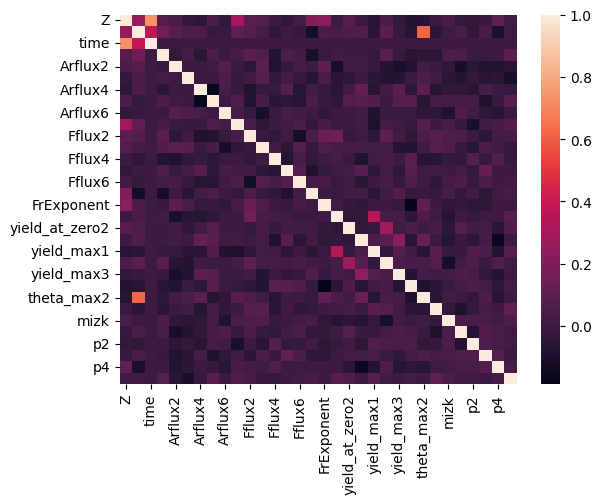

In [69]:
corr = df_final.corr()
heatmap_corr = sns.heatmap(corr)

In [70]:
x_train = df_final.loc[:, ~df_final.columns.isin(['Z','avg fitradius'])]
y_train = df_final[['Z']]
# x_valid = valid_df_final.loc[:, ~valid_df_final.columns.isin(['Z','avg fitradius'])]
# y_valid = valid_df_final[['Z']]
y_test = test_df_final[['Z']]
x_test = test_df_final.drop(['Z','avg fitradius'], axis=1)

In [71]:
# from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

scaler_x_train = PowerTransformer()
X_scale_arr = scaler_x_train.fit_transform(x_train)
df_scaledX = pd.DataFrame(X_scale_arr, columns=x_train.columns)

scaler_y_train = PowerTransformer()
y_scale_arr = scaler_y_train.fit_transform(y_train)
df_scaledy = pd.DataFrame(y_scale_arr, columns=y_train.columns)

# scaler_x_valid = PowerTransformer()
# X_scale_v_arr = scaler_x_valid.fit_transform(x_valid)
# df_scaledX_v = pd.DataFrame(X_scale_v_arr, columns=x_test.columns)

# scaler_y_valid = PowerTransformer()
# y_scale_v_arr = scaler_y_valid.fit_transform(y_valid)
# df_scaledy_v = pd.DataFrame(y_scale_v_arr, columns=y_test.columns)

scaler_x_test = PowerTransformer()
X_scale_t_arr = scaler_x_test.fit_transform(x_test)
df_scaledX_t = pd.DataFrame(X_scale_t_arr, columns=x_test.columns)

scaler_y_test = PowerTransformer()
y_scale_t_arr = scaler_y_test.fit_transform(y_test)
df_scaledy_t = pd.DataFrame(y_scale_t_arr, columns=y_test.columns)


X_train_scaled_reshaped = X_scale_arr.reshape(X_scale_arr.shape[0],1,X_scale_arr.shape[1])
X_train_scaled_reshaped.shape

X_test_scaled_reshaped = X_scale_t_arr.reshape(X_scale_t_arr.shape[0],1,X_scale_t_arr.shape[1])
X_test_scaled_reshaped.shape

# X_valid_scaled_reshaped = X_scale_v_arr.reshape(X_scale_v_arr.shape[0],1,X_scale_v_arr.shape[1])
# X_valid_scaled_reshaped.shape

(600, 1, 30)

Changing time steps

In [72]:
# X_train_scaled_reshaped = X_scale_arr.reshape(int(X_scale_arr.shape[0]/6),6,X_scale_arr.shape[1])
# X_train_scaled_reshaped.shape

# X_test_scaled_reshaped = X_scale_t_arr.reshape(int(X_scale_t_arr.shape[0]/6),6,X_scale_t_arr.shape[1])
# X_test_scaled_reshaped.shape

# y_scale_arr_reshaped = y_scale_arr.reshape(int(y_scale_arr.shape[0]/6),6,y_scale_arr.shape[1])
# y_scale_t_arr_reshaped = y_scale_t_arr.reshape(int(y_scale_t_arr.shape[0]/6),6,y_scale_t_arr.shape[1])
# y_scale_arr_reshaped.shape

In [73]:
# X_df = pd.concat([df_scaledX,df_scaledX_t])
# y_df = pd.concat([df_scaledy,df_scaledy_t])

Random Forest Regressor (Ensemble method)

Using K-fold cross validation

In [74]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import KFold, cross_validate

# def custom_mse(y_true, y_pred):
#     return mean_absolute_error(y_true, y_pred)

# def custom_r2(y_true, y_pred):
#     return r2_score(y_true, y_pred)

# mse_scorer = make_scorer(custom_mse, greater_is_better=False)
# r2_scorer = make_scorer(custom_r2)

# #if using k fold validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# model = RandomForestRegressor(n_estimators=200, random_state=42)

# ##Cross-validation (automatic)

# cv_results = cross_validate(
#     model,X_df , y_df, cv=kf, scoring={'mse': mse_scorer, 'r2': r2_scorer}, return_train_score=True
# )
# print("Cross-Validation MSE:", -cv_results['test_mse'].mean())
# print("Cross-Validation R^2:", cv_results['test_r2'].mean())
# print("\nDetailed Cross-Validation Results:")
# print(pd.DataFrame(cv_results))

Without k-fold

In [75]:
# Without K-fold Cross validation

from sklearn.ensemble import RandomForestRegressor

#after certain value, no of trees doesn't matter
model = RandomForestRegressor(n_estimators=150, random_state=42)

model.fit(X_train_scaled_reshaped.reshape(X_train_scaled_reshaped.shape[0], X_train_scaled_reshaped.shape[2]), y_scale_arr.ravel())
y_pred = model.predict(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0], X_test_scaled_reshaped.shape[2]))

# Evaluate the model
mse = mean_squared_error(y_scale_t_arr, y_pred, multioutput='raw_values').mean()
r2 = r2_score(y_scale_t_arr, y_pred, multioutput='raw_values').mean()

print("Mean Squared Error for each target:", mse)
print("Variance Weighted R^2 Score:", r2)

# Detailed R^2 Score for each target
# r2_individual = r2_score(y_train, y_pred, multioutput='raw_values')
# print("R^2 Score for each target:", r2_individual)

Mean Squared Error for each target: 0.16393959051550644
Variance Weighted R^2 Score: 0.8360604094844936


In [77]:
predictions = scaler_y_test.inverse_transform(y_pred.reshape(-1,1))
x_test_plot = scaler_x_test.inverse_transform(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0],X_test_scaled_reshaped.shape[2]))

c:\Users\jayra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\jayra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


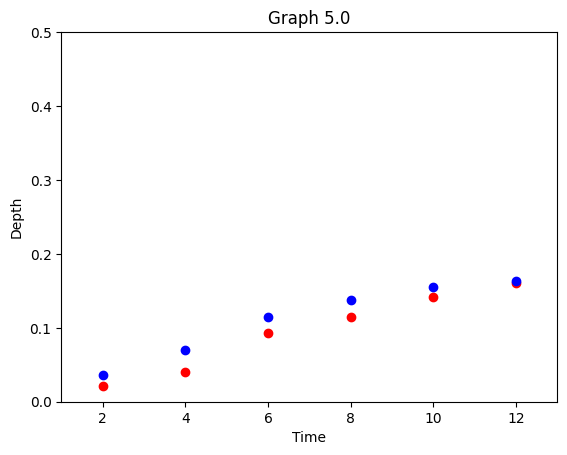

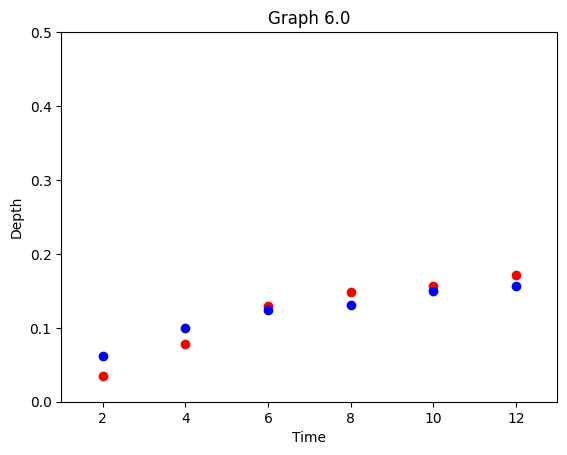

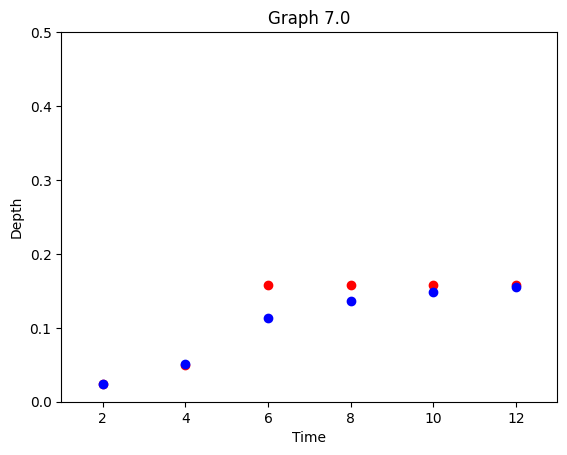

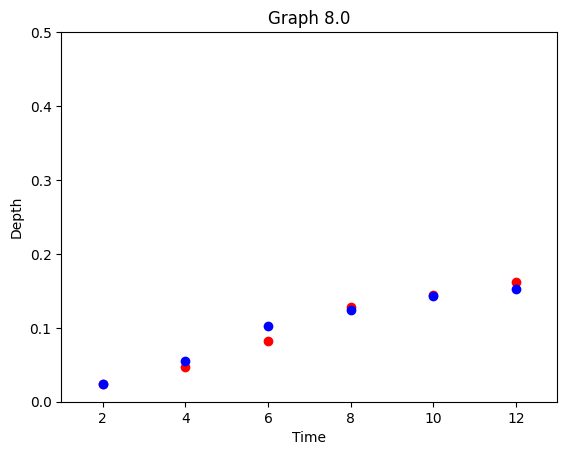

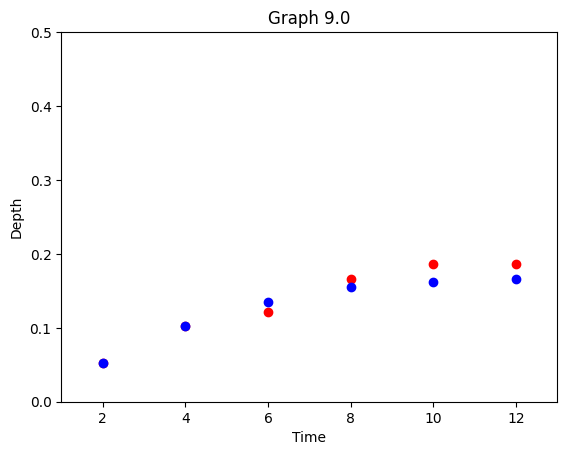

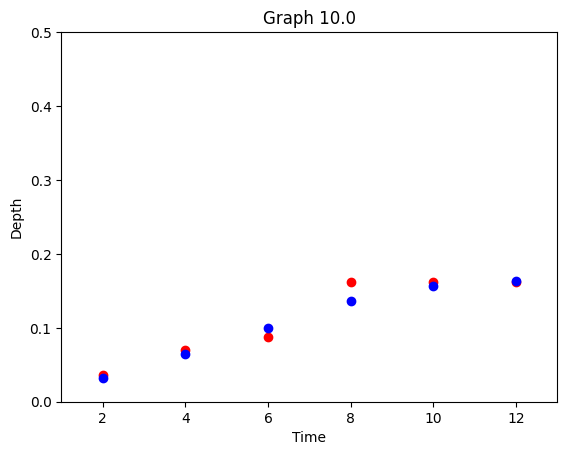

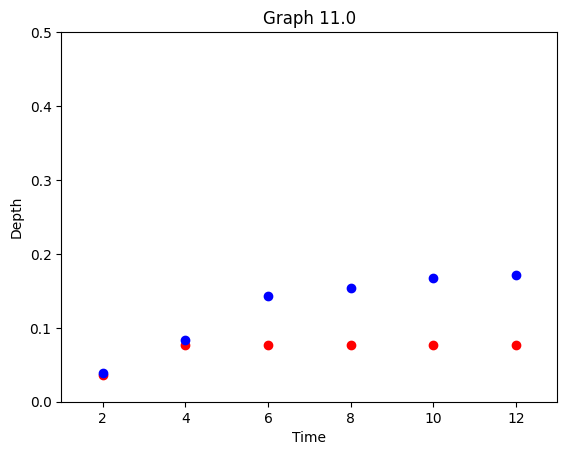

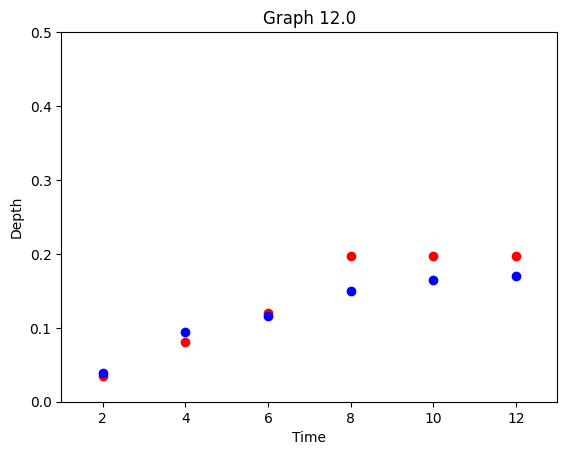

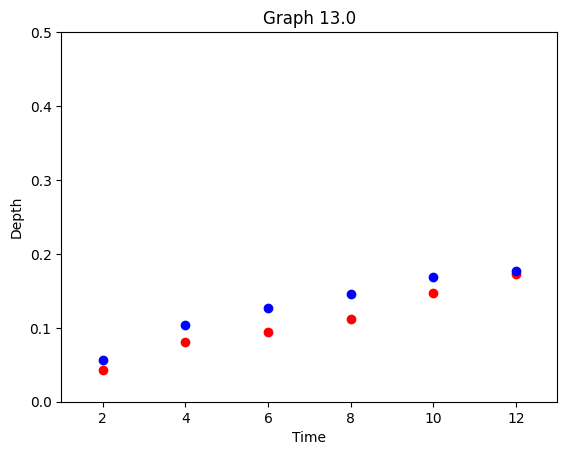

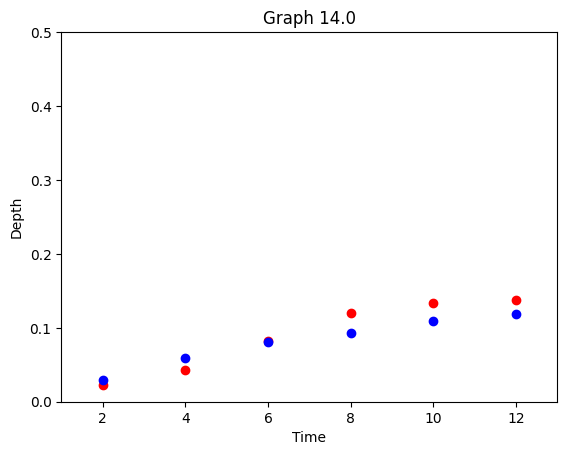

In [78]:
for i in range(6*5,6*15,6):
    # plt.clf()
    # clear_output(wait=True)
    plt.figure()
    plt.xlim(1,13)
    plt.ylim(0,0.5)
    plt.title(f'Graph {i/6}')
    plt.xlabel('Time')
    plt.ylabel('Depth')
    plt.scatter(x_test.iloc[i-6:i,0],y_test.iloc[i-6:i,0],c='red',label=f'True values')
    plt.scatter(x_test_plot[i-6:i,0],predictions[i-6:i,0],c='blue',label=f'Predicted values')
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()

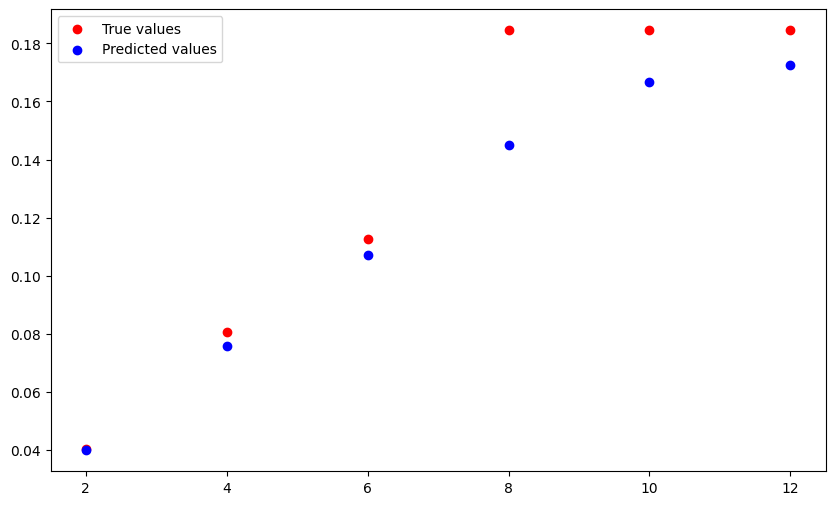

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,6))

# plt.scatter(x_test.iloc[6:12,0],y_test.iloc[6:12,0],c='red',label=f'True values')
# # plt.plot(x_test.iloc[6:12,0],y_test.iloc[6:12,0], 'r--')
# plt.scatter(x_test_plot[6:12,0],predictions[6:12,0],linestyle='-',c='blue',label=f'Predicted values')
# # plt.plot(x_test_plot[6:12,0],predictions[6:12,0], 'b--')

# plt.legend()
# plt.show()


LSTM model

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(100, input_shape=input_shape, return_sequences=True, activation='relu')))
    model.add(Bidirectional(LSTM(50,  dropout=0.3, return_sequences=True, activation='relu')))
    model.add(Bidirectional(LSTM(30, dropout=0.2, activation='relu')))
    
    model.add(Dense(1))  # Assuming 2 target variables
    model.compile(optimizer='adam', loss='mae')
    return model

In [82]:
# Build and train the model
from keras.callbacks import EarlyStopping

model = create_lstm_model(input_shape=(X_train_scaled_reshaped.shape[1], X_train_scaled_reshaped.shape[2]))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1)
history = model.fit(X_train_scaled_reshaped, y_scale_arr, epochs=1000, batch_size=2, verbose=1, validation_data=(X_test_scaled_reshaped, y_scale_t_arr), callbacks=[early_stopping])

# val_loss = model.evaluate(X_valid_scaled_reshaped,y_scale_v_arr)
# print(f'Validation Loss: {val_loss}')

# Predict on the test set
y_pred = model.predict(X_test_scaled_reshaped)

Epoch 1/1000
1200/1200 [==============================] - 11s 5ms/step - loss: 0.4602 - val_loss: 0.3375
Epoch 2/1000
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3010 - val_loss: 0.2957
Epoch 3/1000
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2669 - val_loss: 0.3077
Epoch 4/1000
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2420 - val_loss: 0.2918
Epoch 5/1000
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2289 - val_loss: 0.2897
Epoch 6/1000
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2126 - val_loss: 0.3014
Epoch 7/1000
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2036 - val_loss: 0.2858
Epoch 8/1000
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1929 - val_loss: 0.2604
Epoch 9/1000
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1889 - val_loss: 0.2734
Epoch 10/1000
1200/1200 [==============================] - 7s 6

In [83]:
def relative_mean_absolute_error(y_true, y_pred):
    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate Mean Absolute Error (MAE)
    rmae = np.mean((np.abs(y_true - y_pred))**2/y_true)
    
    
    return rmae

In [84]:
def custom_mse(y_true, y_pred):
    return relative_mean_absolute_error(y_true, y_pred)

def custom_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Evaluate the model
mae = custom_mse(y_scale_t_arr, y_pred)
r2_score_c= custom_r2(y_scale_t_arr, y_pred)

print("Relative Mean Abs Error (MAE):", mae)
print("R2 score: ", r2_score_c)

Relative Mean Abs Error (MAE): 0.1007571653572684
R2 score:  0.876617819396654


In [85]:
predictions = scaler_y_test.inverse_transform(y_pred)
x_test_plot = scaler_x_test.inverse_transform(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0],30))

c:\Users\jayra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\jayra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


plot of CD(fit radius) vs Z for true and predicted

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,6))

# plt.scatter(y_test.iloc[:6,0],y_test.iloc[:6,1],c='red',label=f'True values')
# plt.plot(y_test.iloc[:6,0],y_test.iloc[:6,1],'r--')
# plt.scatter(predictions[:6,0],predictions[:6,1],linestyle='-',c='blue',label=f'Predicted values')
# # plt.plot(x_test_plot[:6,0],predictions[:6,0],'b--')

# plt.legend()
# plt.show()


plot of true value and predicted value

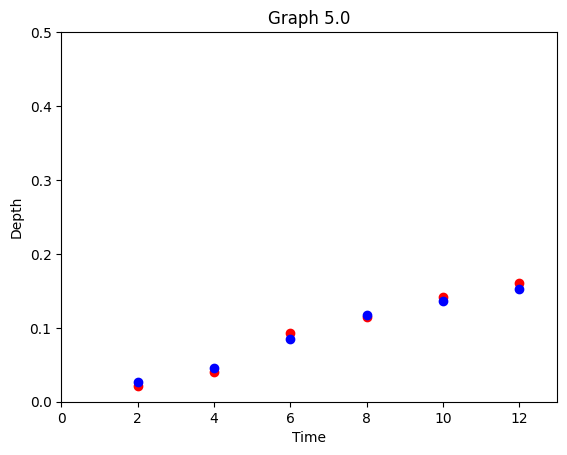

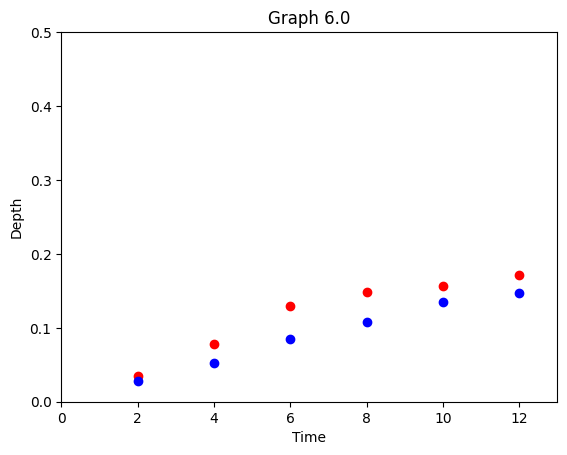

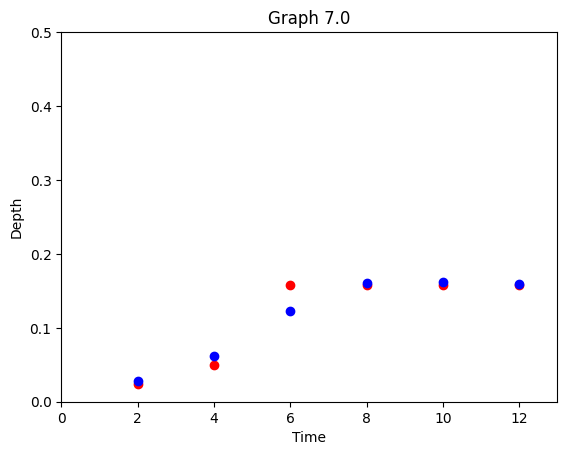

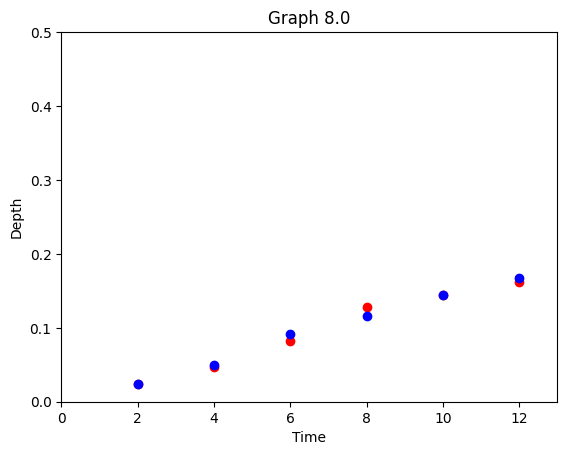

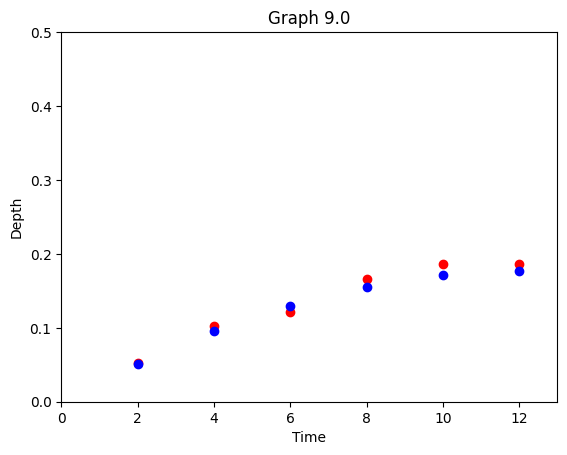

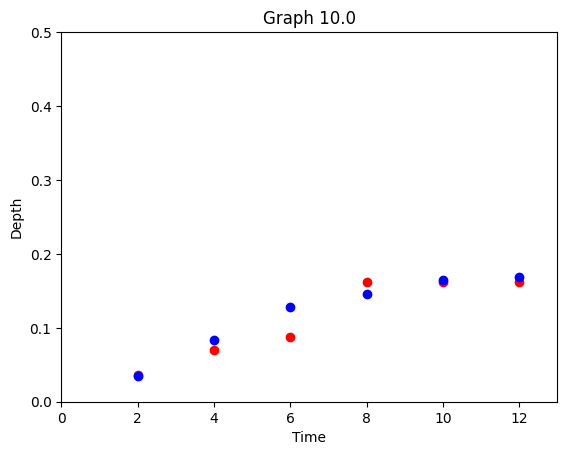

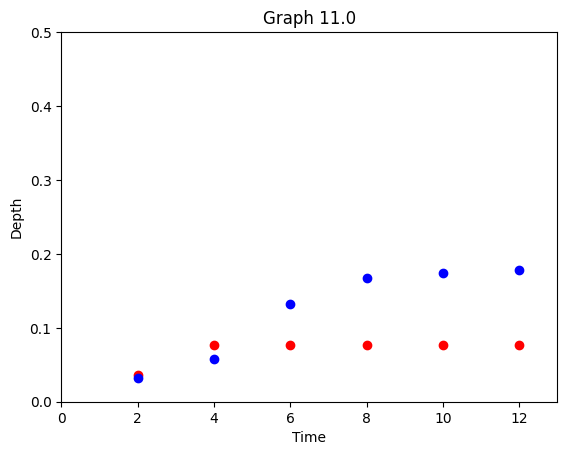

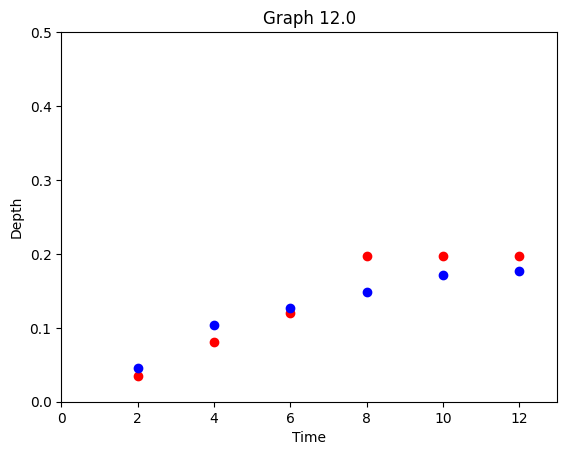

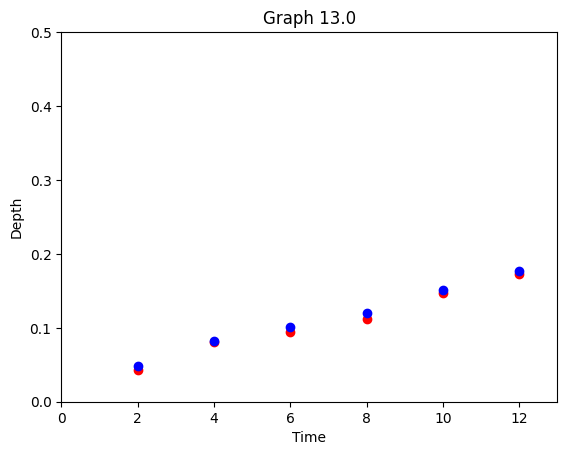

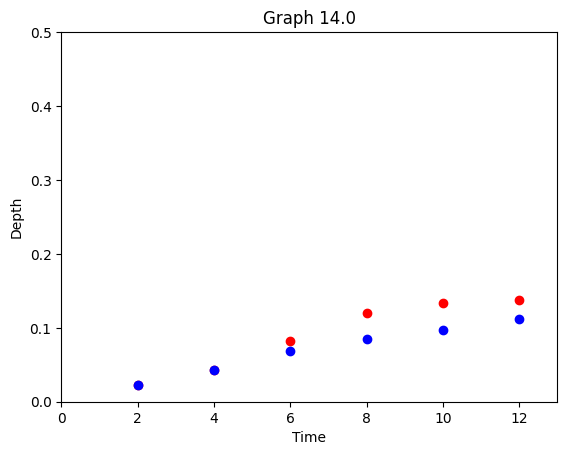

In [87]:
for i in range(6*5,6*15,6):
    # plt.clf()
    # clear_output(wait=True)
    plt.figure()
    plt.xlim(0,13)
    plt.ylim(0,0.5)
    plt.title(f'Graph {i/6}')
    plt.xlabel('Time')
    plt.ylabel('Depth')
    plt.scatter(x_test.iloc[i-6:i,0],y_test.iloc[i-6:i,0],c='red',label=f'True values')
    plt.scatter(x_test_plot[i-6:i,0],predictions[i-6:i,0],c='blue',label=f'Predicted values')
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()
   

In [ ]:
# predictions_df = pd.DataFrame(predictions, columns=['Z'])
# predictions_df.head(12)

In [ ]:
# plt.scatter(x_test.iloc[:,0],y_test.iloc[:,0],c='red',label=f'True values')
# plt.scatter(x_test_plot[:,0],predictions[:,0],linestyle='-',c='blue',label=f'Predicted values')
# plt.legend()

SARIMA model (only for univariate models, so can't be used here)

GMM

In [ ]:
# from sklearn.mixture import GaussianMixture

# gmm = GaussianMixture(n_components=6, max_iter=50)
# x_train_clusters = gmm.fit_predict(x_train)

# gmm_test = GaussianMixture(n_components=6, max_iter=50)
# x_test_clusters = gmm.fit_predict(x_test)

In [ ]:
# plt.plot(x_train_clusters)

In [ ]:
# X_cluster_df = pd.DataFrame(np.concatenate())

GNNs using spektal gnn instead of tf gnn

In [98]:
import numpy as np
import tensorflow as tf
from spektral.data import Dataset, Graph
from spektral.layers import GCNConv, GlobalAvgPool, GlobalMaxPool
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Assuming X_train_scaled_reshaped, X_test_scaled_reshaped, y_scale_arr, and y_test are available and formatted as required

# Sample data preparation
num_nodes = X_train_scaled_reshaped.shape[1]
num_features = X_train_scaled_reshaped.shape[2]
num_classes = y_scale_arr.shape[1]

# Generate adjacency matrix (modify to reflect your actual graph structure)
# This is a simple example, consider using a sparse matrix for larger graphs
#so using zeroes instead of ones
A = np.zeros((num_nodes, num_nodes)) + np.eye(num_nodes)

# Define a custom Spektral dataset
class MyDataset(Dataset):
    def __init__(self, X, A, y, **kwargs):
        self.X = X
        self.A = A
        self.y = y
        super().__init__(**kwargs)

    def read(self):
        graphs = []
        for i in range(len(self.X)):
            x = self.X[i]
            a = self.A
            y = self.y[i]
            graphs.append(Graph(x=x, a=a, y=y))
        return graphs

# Create datasets
train_dataset = MyDataset(X_train_scaled_reshaped, A, y_scale_arr)
test_dataset = MyDataset(X_test_scaled_reshaped, A, y_scale_t_arr)

# Define the GNN model using Spektral
def create_gnn_model(input_shape, output_shape):
    X_in = Input(shape=input_shape, name='node_features')
    A_in = Input(shape=(num_nodes,), sparse=True, name='adjacency_matrix')

    # Graph Convolutional Layer
    x = GCNConv(400,activation='relu')([X_in, A_in])
    x = GlobalMaxPool()(x)
    # x = GCNConv(50)([x])
    # x = GlobalMaxPool()(x)

    # Fully connected layers
    x = Dense(50)(x)
    outputs = Dense(output_shape)(x)

    return Model(inputs=[X_in, A_in], outputs=outputs)

# Create and compile the model
input_shape = (num_nodes, num_features)
output_shape = y_scale_arr.shape[1]
model = create_gnn_model(input_shape, output_shape)
model.compile(optimizer='adam', loss='mae')

# Convert the dataset to TensorFlow data format
def dataset_to_tfdata(dataset):
    def generator():
        for graph in dataset:
            yield (graph.x, graph.a), graph.y
    return tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            (tf.TensorSpec(shape=(num_nodes, num_features), dtype=tf.float32),
             tf.TensorSpec(shape=(num_nodes, num_nodes), dtype=tf.float32)),
            tf.TensorSpec(shape=(num_classes,), dtype=tf.float32)
        )
    )

# Create TensorFlow datasets
train_tfdata = dataset_to_tfdata(train_dataset).batch(1)
test_tfdata = dataset_to_tfdata(test_dataset).batch(1)

# Train the model
model.fit(train_tfdata, epochs=100)

# Evaluate the model
loss = model.evaluate(test_tfdata)
print(f"Test Loss: {loss}")

# Predict on the test set
y_pred = model.predict(test_tfdata)


Epoch 1/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.5707
Epoch 2/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3988
Epoch 3/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3640
Epoch 4/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3538
Epoch 5/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3376
Epoch 6/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3018
Epoch 7/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3066
Epoch 8/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2798
Epoch 9/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2890
Epoch 10/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2690
Epoch 11/100
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2699
Epoch 12/100
2400/2400 [==============================] - 4s 2ms/step - lo

In [99]:
predictions = scaler_y_test.inverse_transform(y_pred)

c:\Users\jayra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [100]:
# plt.scatter(x_test.iloc[6:12,0],y_test.iloc[6:12,0],c='red',label=f'True values')
# plt.scatter(x_test_plot[6:12,0],predictions[6:12,0],linestyle='-',c='blue',label=f'Predicted values')
# plt.legend()

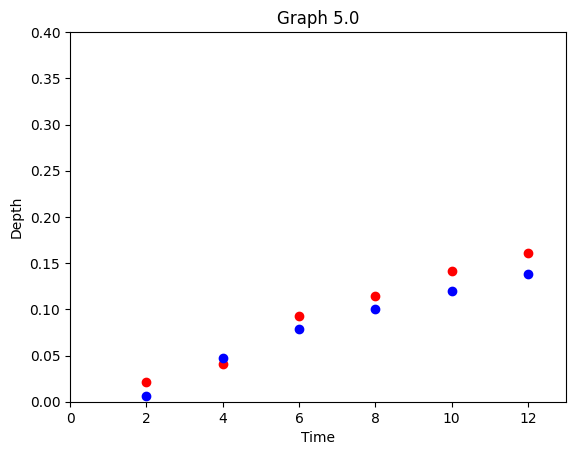

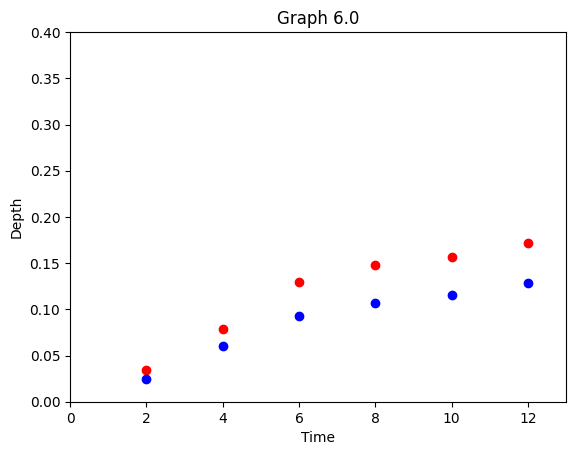

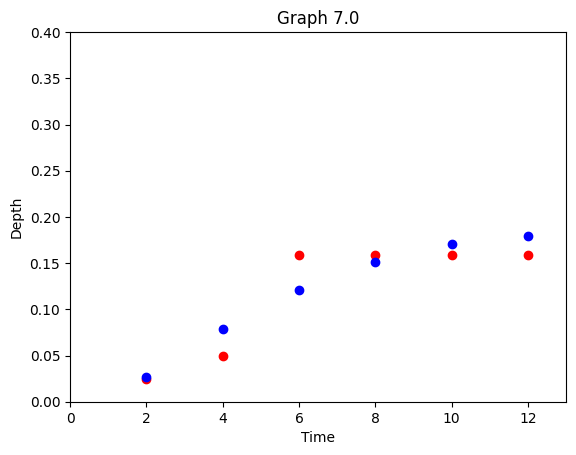

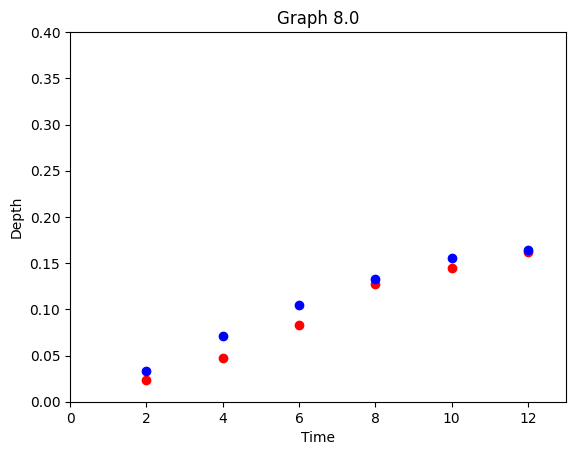

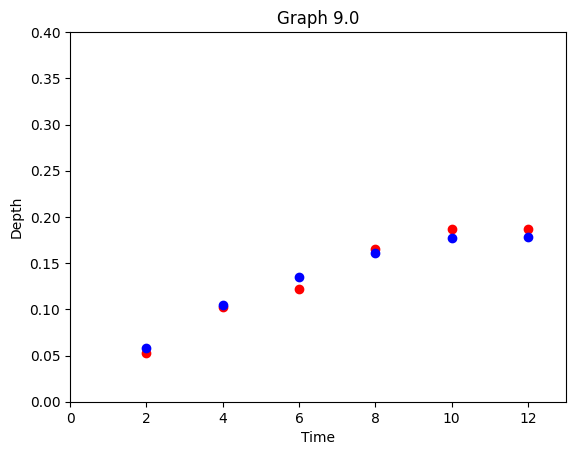

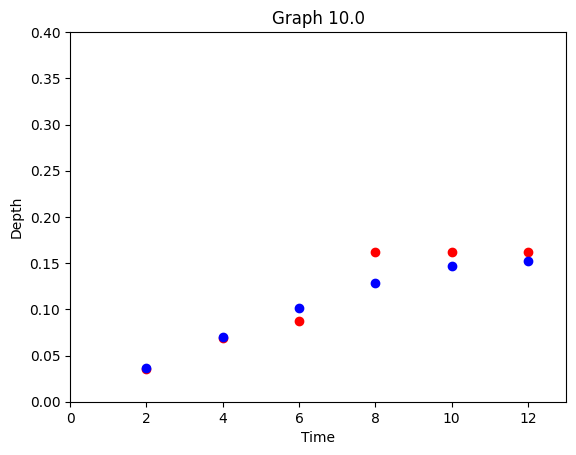

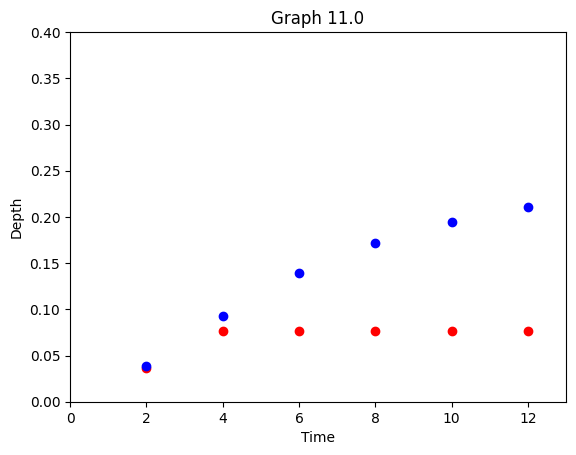

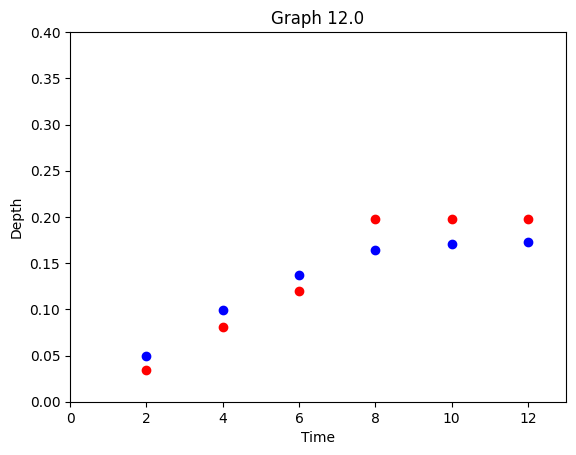

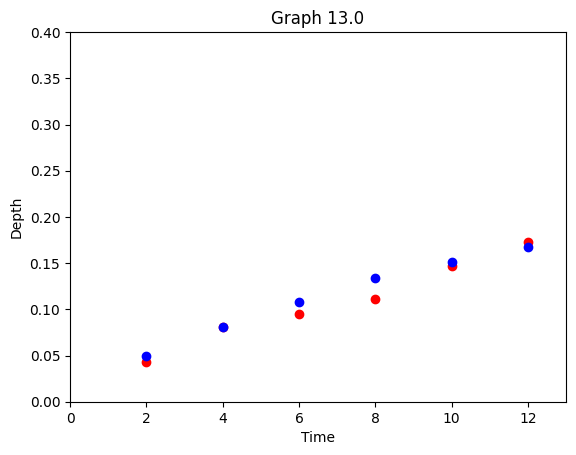

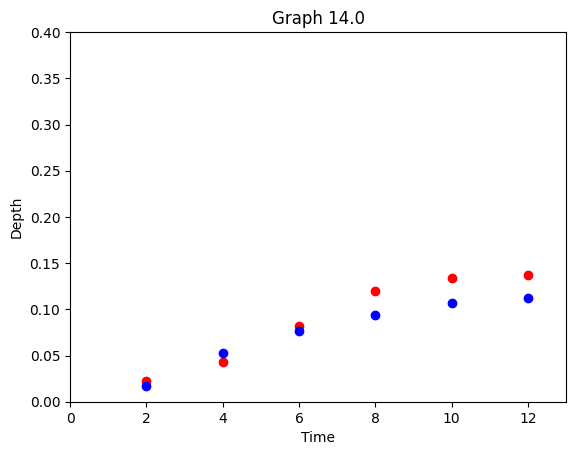

In [101]:
for i in range(6*5,6*15,6):
    # plt.clf()
    # clear_output(wait=True)
    plt.figure()
    plt.xlim(0,13)
    plt.ylim(0,0.4)
    plt.title(f'Graph {i/6}')
    plt.xlabel('Time')
    plt.ylabel('Depth')
    plt.scatter(x_test.iloc[i-6:i,0],y_test.iloc[i-6:i,0],c='red',label=f'True values')
    plt.scatter(x_test_plot[i-6:i,0],predictions[i-6:i,0],c='blue',label=f'Predicted values')
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()

LSTM with attention/CNN

In [92]:
from tensorflow.keras.layers import Attention
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dropout
from keras.callbacks import EarlyStopping

def create_lstm_with_cnn(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(200, input_shape=input_shape, return_sequences=True, activation='relu')))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(100, input_shape=input_shape, return_sequences=True, activation='relu')))
    model.add(Dropout(0.3))
    model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1))  # Assuming 1 target variable
    model.compile(optimizer='adam', loss='mae')
    return model

In [93]:
# Build and train the model
model = create_lstm_with_cnn(input_shape=(X_train_scaled_reshaped.shape[1], X_train_scaled_reshaped.shape[2]))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1)
history = model.fit(X_train_scaled_reshaped, y_scale_arr, epochs=1000, batch_size=8, verbose=1, validation_data=(X_test_scaled_reshaped, y_scale_t_arr), callbacks=[early_stopping])

# val_loss = model.evaluate(X_valid_scaled_reshaped,y_scale_v_arr)
# print(f'Validation Loss: {val_loss}')

# Predict on the test set
y_pred = model.predict(X_test_scaled_reshaped)

Epoch 1/1000
300/300 [==============================] - 7s 12ms/step - loss: 0.5101 - val_loss: 0.3499
Epoch 2/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.3209 - val_loss: 0.3080
Epoch 3/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.2883 - val_loss: 0.2919
Epoch 4/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.2705 - val_loss: 0.3050
Epoch 5/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.2568 - val_loss: 0.2815
Epoch 6/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.2401 - val_loss: 0.2785
Epoch 7/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.2302 - val_loss: 0.2843
Epoch 8/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.2219 - val_loss: 0.2763
Epoch 9/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.2161 - val_loss: 0.2936
Epoch 10/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.20

In [94]:
def relative_mean_absolute_error(y_true, y_pred):
    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate Mean Absolute Error (MAE)
    rmae = np.mean((np.abs(y_true - y_pred))/y_true)
    
    
    return rmae

def custom_mse(y_true, y_pred):
    return relative_mean_absolute_error(y_true, y_pred)

def custom_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Evaluate the model
mae = custom_mse(y_scale_t_arr, y_pred)
r2_score_c= custom_r2(y_scale_t_arr, y_pred)

print("Relative Mean Abs Error (MAE):", mae)
print("R2 score: ", r2_score_c)

Relative Mean Abs Error (MAE): 0.16134525356795573
R2 score:  0.8838578248952247


In [95]:
predictions_ = scaler_y_test.inverse_transform(y_pred)
x_test_plot = scaler_x_test.inverse_transform(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0],30))

c:\Users\jayra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\jayra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


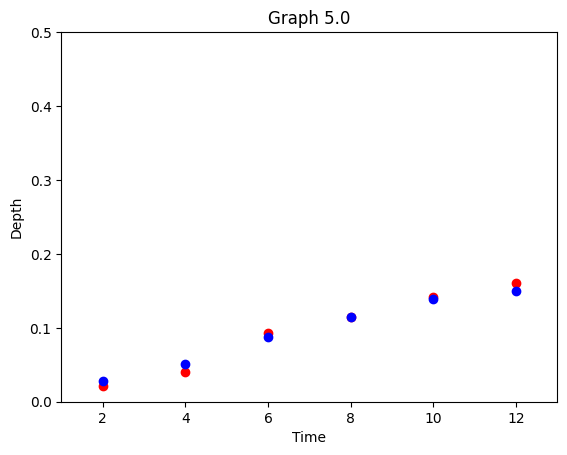

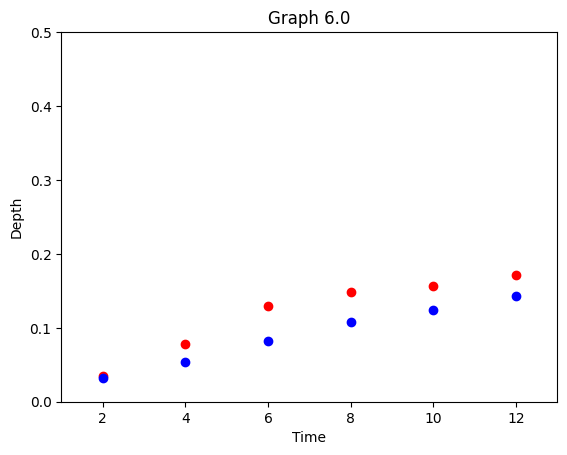

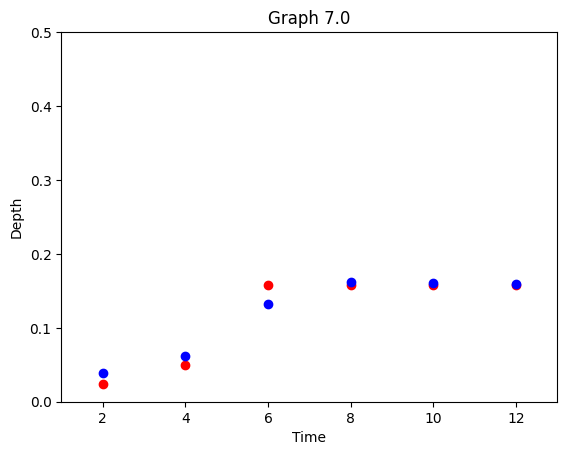

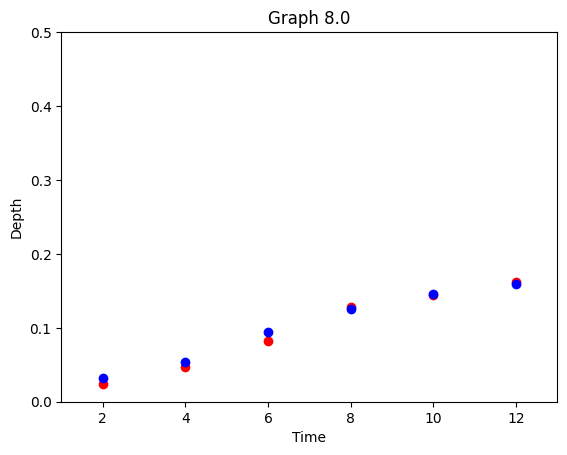

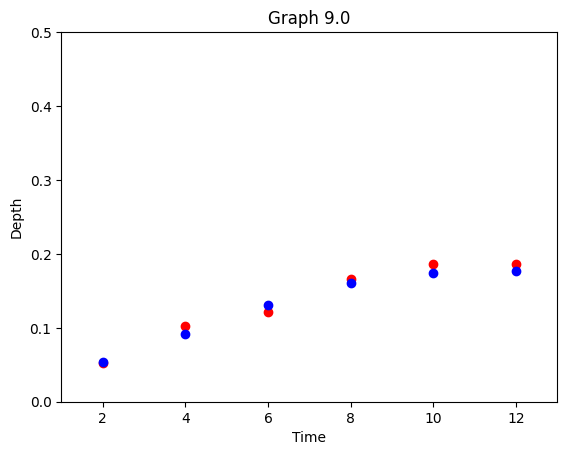

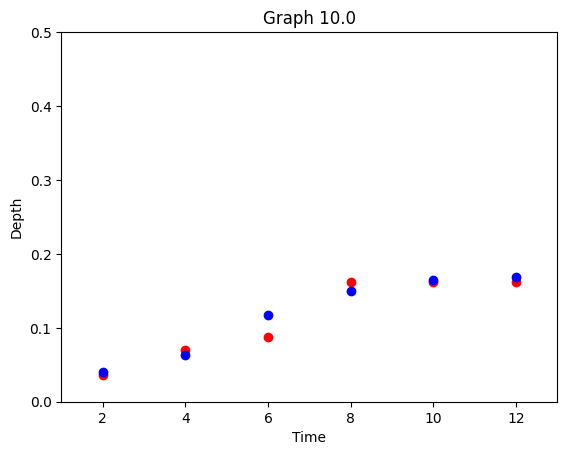

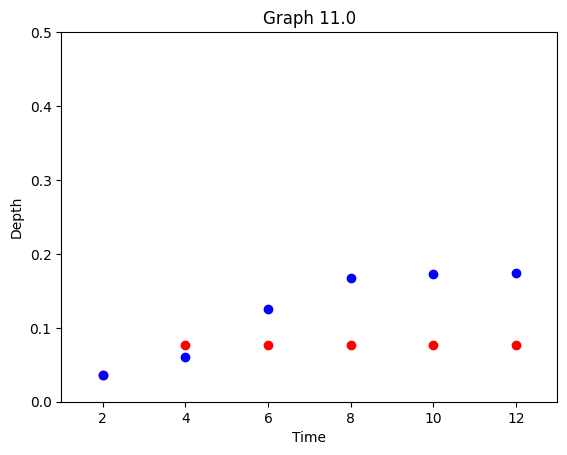

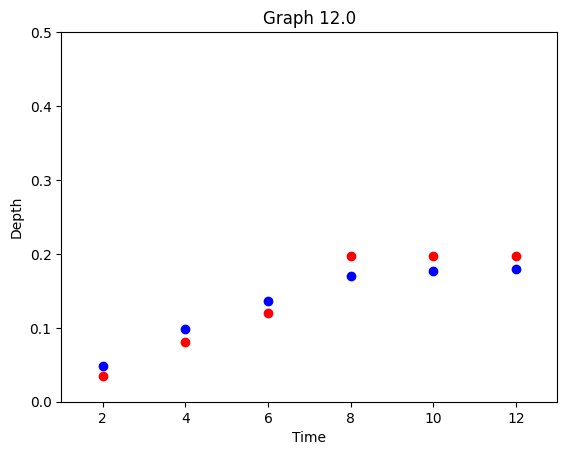

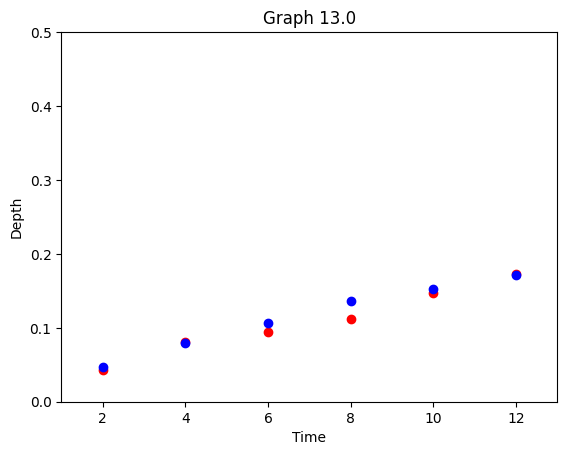

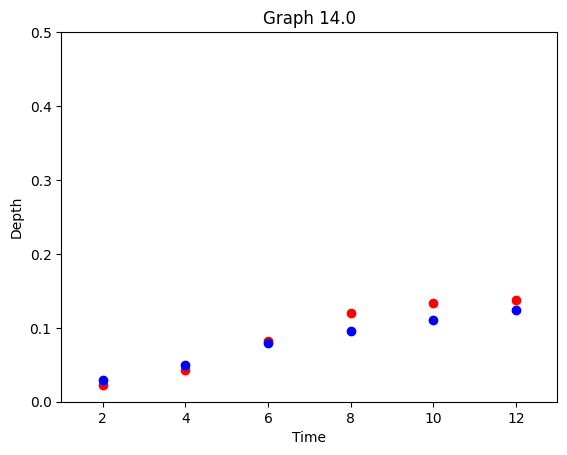

In [96]:
for i in range(6*5,6*15,6):
    # plt.clf()
    # clear_output(wait=True)
    plt.figure()
    plt.xlim(1,13)
    plt.ylim(0,0.5)
    plt.title(f'Graph {i/6}')
    plt.xlabel('Time')
    plt.ylabel('Depth')
    plt.scatter(x_test.iloc[i-6:i,0],y_test.iloc[i-6:i,0],c='red',label=f'True values')
    plt.scatter(x_test_plot[i-6:i,0],predictions_[i-6:i,0],c='blue',label=f'Predicted values')
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()